In [1]:
# Import libraries
import numpy as np
import pandas as pd
import os
import sys
sys.path.append(os.path.abspath('/Users/idrees/Code/govxs/'))
from model.VotingModel import VotingModel
from model.EvalMetrics import EvalMetrics

# Add the directory containing the VotingModel to the Python path

from model.VotingRules import VotingRules

# Initialize simulation parameters
num_voters = 5
num_projects = 5
total_op_tokens = 3000
num_rounds = 100
voter_type = 'random_uniform_model'
quorum=17
# Initialize the model
model = VotingModel(voter_type=voter_type, num_voters=num_voters, num_projects=num_projects, total_op_tokens=total_op_tokens)

# Add custom voting rules if any OR just simply add new voting rule in VotingRules.py class
# Example:
# model.add_voting_rule("custom_rule", custom_rule_function)

# Initialize the evaluation metrics
eval_metrics = EvalMetrics(model)

/Users/idrees/Code/govxs/agents/VoterAgent.py:7: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


# Evaluate Gini Index

In [2]:

gini_results = eval_metrics.evaluate_gini_index(num_rounds)
print("Gini Index Results:")
gini_results.head(100)

Gini Index Results:


,round,majoritarian_moving_phantoms_gini_index,r1_quadratic_gini_index,r2_mean_gini_index,r3_median_gini_index
0,1,-0.192142,-0.133039,-0.049209,-0.117087
1,2,-0.026265,-0.103580,-0.021049,0.054396
2,3,-0.044232,-0.107635,-0.045609,0.082928
3,4,0.075712,-0.029358,0.094580,0.121230
4,5,-0.025229,-0.109705,-0.041070,0.069119
...,...,...,...,...,...
95,96,-0.053255,-0.155089,-0.128582,-0.012331
96,97,0.015615,-0.091593,-0.042384,0.020842
97,98,-0.011485,-0.085702,-0.010365,0.089050
98,99,-0.059308,-0.128175,-0.040729,0.150692


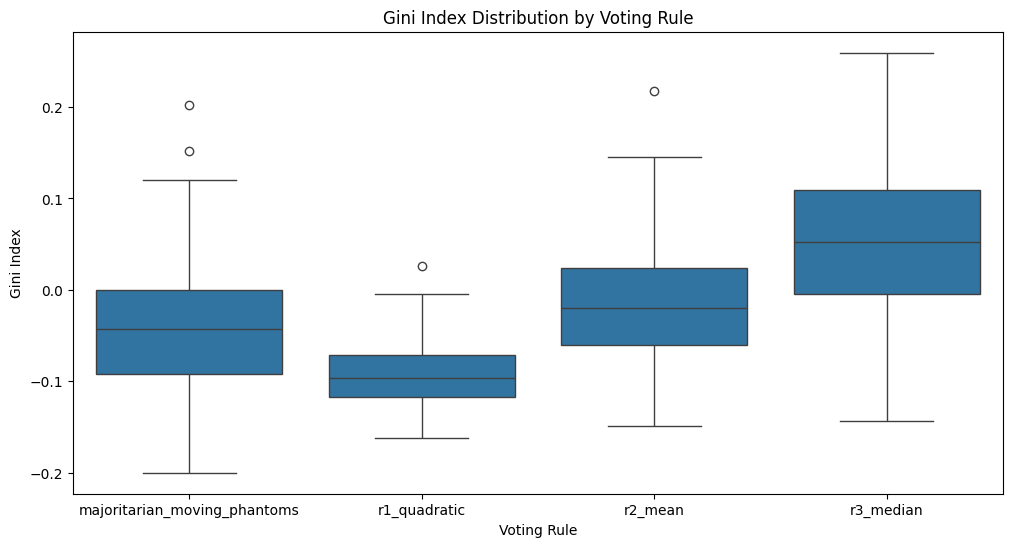

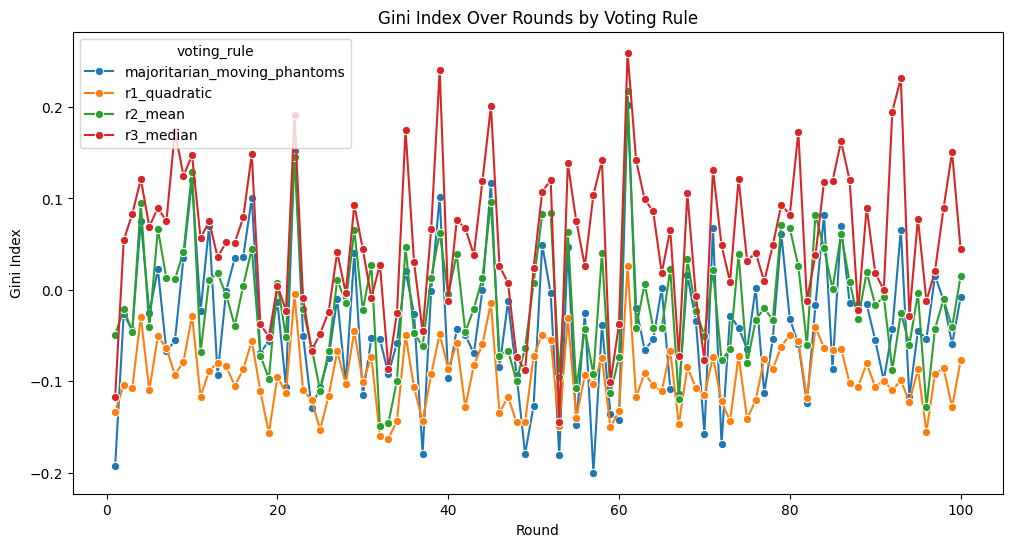

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for box plot
gini_results_long = gini_results.melt(id_vars=['round'], var_name='voting_rule', value_name='gini_index')
gini_results_long['voting_rule'] = gini_results_long['voting_rule'].str.replace('_gini_index', '')

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='voting_rule', y='gini_index', data=gini_results_long)
plt.title('Gini Index Distribution by Voting Rule')
plt.xlabel('Voting Rule')
plt.ylabel('Gini Index')
plt.show()

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='round', y='gini_index', hue='voting_rule', data=gini_results_long, marker='o')
plt.title('Gini Index Over Rounds by Voting Rule')
plt.xlabel('Round')
plt.ylabel('Gini Index')
plt.show()


# Evaluate Alignment with Ground Truth

In [4]:



alignment_results = eval_metrics.evaluate_alignment(num_rounds)
print("Alignment Results:")
alignment_results.head(100)



Alignment Results:


,round,majoritarian_moving_phantoms_hamming_distance,r1_quadratic_hamming_distance,r2_mean_hamming_distance,r3_median_hamming_distance
0,1,0,0,0,0
1,2,0,0,0,0
2,3,0,0,0,0
3,4,0,0,0,0
4,5,0,0,0,0
...,...,...,...,...,...
95,96,0,0,0,0
96,97,0,0,0,0
97,98,0,0,0,0
98,99,0,0,0,0


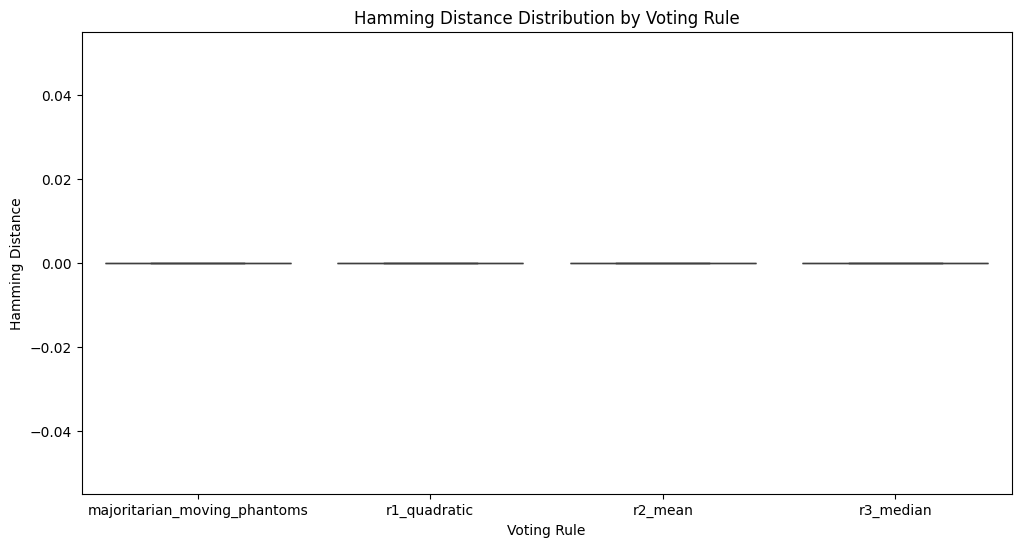

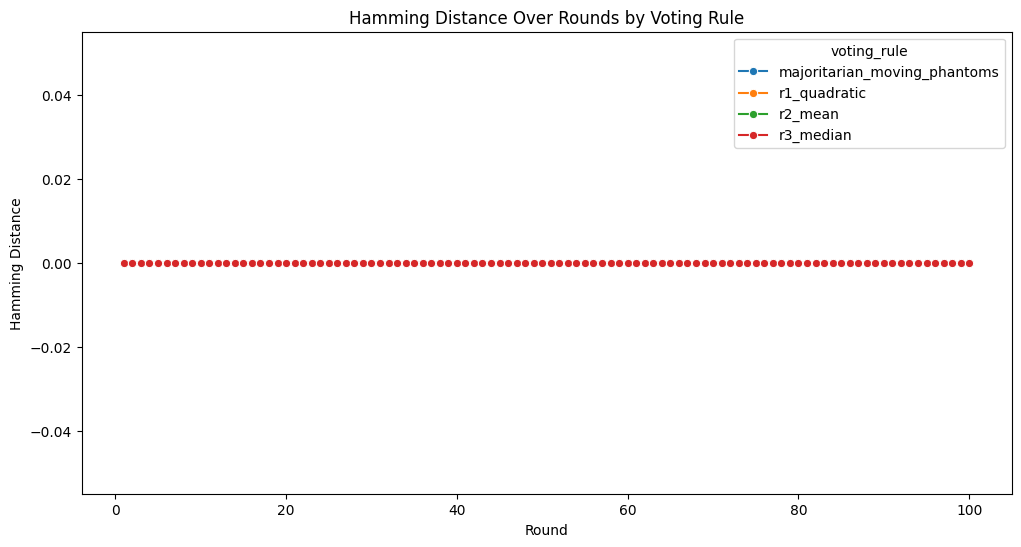

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
alignment_results_long = alignment_results.melt(id_vars=['round'], var_name='voting_rule', value_name='hamming_distance')
alignment_results_long['voting_rule'] = alignment_results_long['voting_rule'].str.replace('_hamming_distance', '')

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='voting_rule', y='hamming_distance', data=alignment_results_long)
plt.title('Hamming Distance Distribution by Voting Rule')
plt.xlabel('Voting Rule')
plt.ylabel('Hamming Distance')
plt.show()

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='round', y='hamming_distance', hue='voting_rule', data=alignment_results_long, marker='o')
plt.title('Hamming Distance Over Rounds by Voting Rule')
plt.xlabel('Round')
plt.ylabel('Hamming Distance')
plt.show()


In [6]:
def calculate_alignment_metrics(alignment_results):
    metrics = {
        "voting_rule": [],
        "mean_hamming_distance": [],
        "std_hamming_distance": [],
        "min_hamming_distance": [],
        "max_hamming_distance": []
    }
    
    for voting_rule in model.voting_rules.keys():
        hamming_distances = alignment_results[f"{voting_rule}_hamming_distance"]
        metrics["voting_rule"].append(voting_rule)
        metrics["mean_hamming_distance"].append(np.mean(hamming_distances))
        metrics["std_hamming_distance"].append(np.std(hamming_distances))
        metrics["min_hamming_distance"].append(np.min(hamming_distances))
        metrics["max_hamming_distance"].append(np.max(hamming_distances))
    
    return pd.DataFrame(metrics)

# Calculate metrics
alignment_metrics = calculate_alignment_metrics(alignment_results)

alignment_metrics


,voting_rule,mean_hamming_distance,std_hamming_distance,min_hamming_distance,max_hamming_distance
0,majoritarian_moving_phantoms,0.0,0.0,0,0
1,r1_quadratic,0.0,0.0,0,0
2,r2_mean,0.0,0.0,0,0
3,r3_median,0.0,0.0,0,0


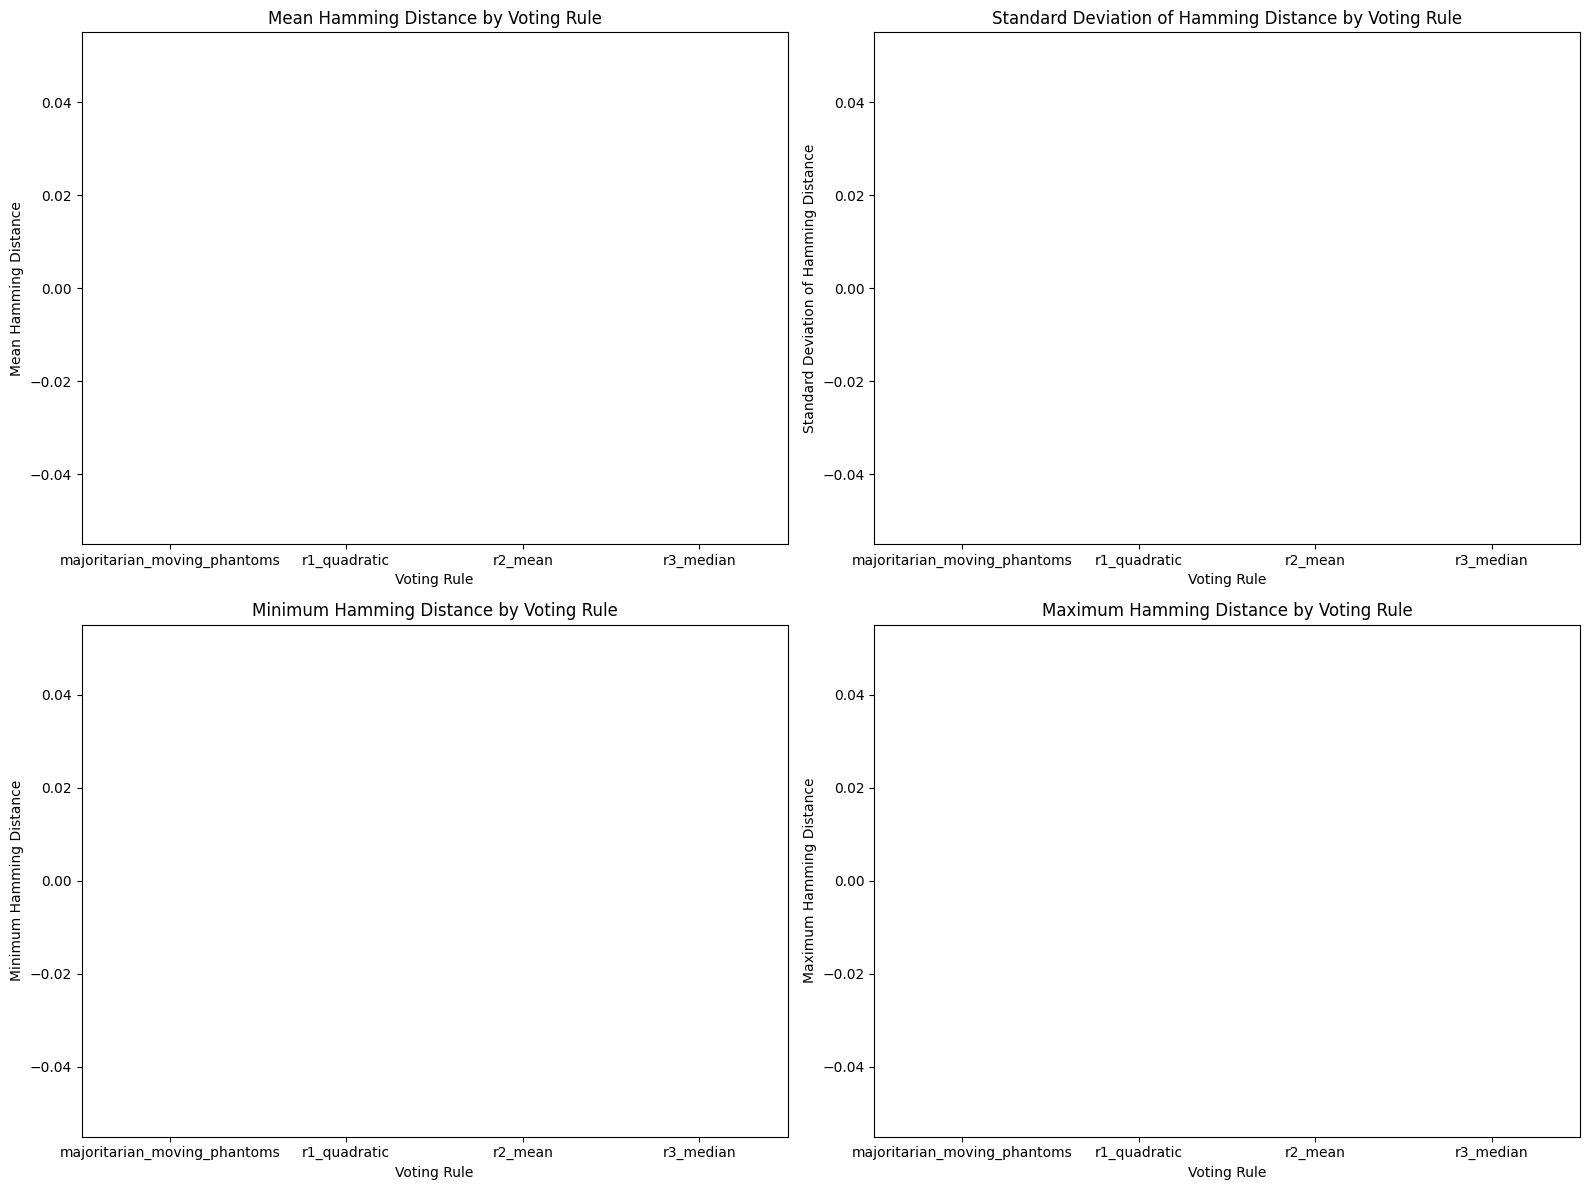

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Mean Hamming Distance
sns.barplot(x='voting_rule', y='mean_hamming_distance', data=alignment_metrics, ax=axes[0, 0])
axes[0, 0].set_title('Mean Hamming Distance by Voting Rule')
axes[0, 0].set_xlabel('Voting Rule')
axes[0, 0].set_ylabel('Mean Hamming Distance')

# Standard Deviation of Hamming Distance
sns.barplot(x='voting_rule', y='std_hamming_distance', data=alignment_metrics, ax=axes[0, 1])
axes[0, 1].set_title('Standard Deviation of Hamming Distance by Voting Rule')
axes[0, 1].set_xlabel('Voting Rule')
axes[0, 1].set_ylabel('Standard Deviation of Hamming Distance')

# Minimum Hamming Distance
sns.barplot(x='voting_rule', y='min_hamming_distance', data=alignment_metrics, ax=axes[1, 0])
axes[1, 0].set_title('Minimum Hamming Distance by Voting Rule')
axes[1, 0].set_xlabel('Voting Rule')
axes[1, 0].set_ylabel('Minimum Hamming Distance')

# Maximum Hamming Distance
sns.barplot(x='voting_rule', y='max_hamming_distance', data=alignment_metrics, ax=axes[1, 1])
axes[1, 1].set_title('Maximum Hamming Distance by Voting Rule')
axes[1, 1].set_xlabel('Voting Rule')
axes[1, 1].set_ylabel('Maximum Hamming Distance')

plt.tight_layout()
plt.show()


# Evaluate Social Welfare

In [8]:

social_welfare_results = eval_metrics.evaluate_social_welfare(num_rounds)
#social_welfare_results = eval_metrics.evaluate_social_welfare_1(num_rounds)
print("Social Welfare Results:")
social_welfare_results.head(100)

Social Welfare Results:


,round,majoritarian_moving_phantoms_social_welfare,r1_quadratic_social_welfare,r2_mean_social_welfare,r3_median_social_welfare
0,1,1901.183195,2114.843457,2076.280124,1936.197868
1,2,1408.121133,1738.627039,1548.904094,1506.574794
2,3,1696.740163,1708.913044,1712.595180,1696.740160
3,4,1677.151099,1713.062705,1680.217703,1800.945460
4,5,1273.742196,1292.947202,1273.742196,1273.742196
...,...,...,...,...,...
95,96,1822.773503,1850.423541,1860.772320,1938.946587
96,97,1968.290463,1968.290463,1974.887650,1968.290463
97,98,2049.766018,2409.231322,2219.565623,2069.190886
98,99,1429.116616,1708.949733,1574.838537,1440.061461


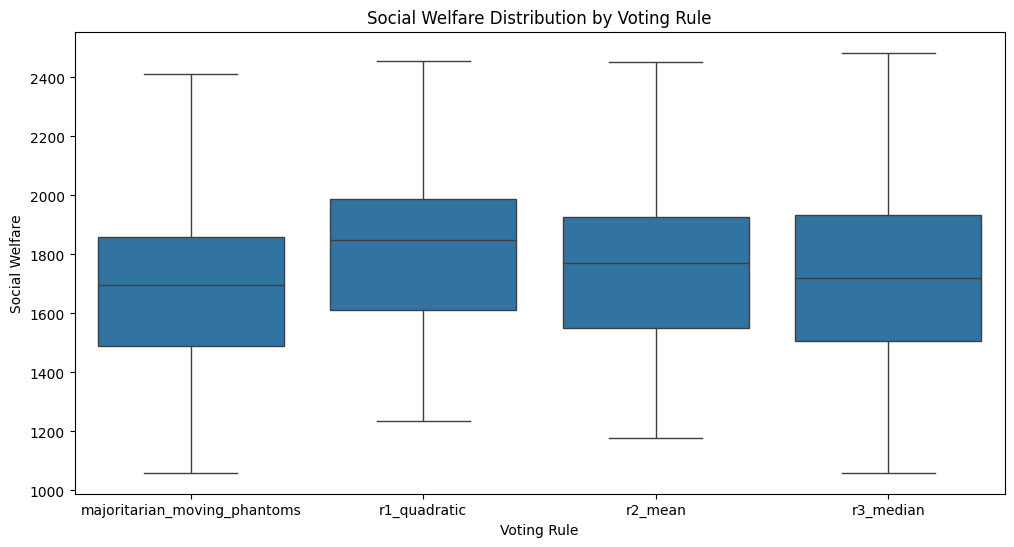

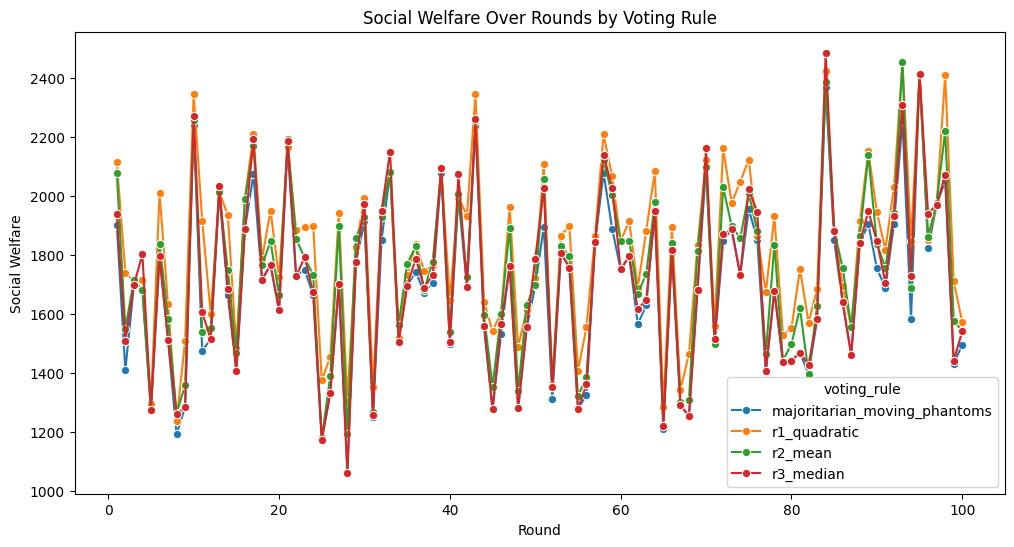

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
social_welfare_results_long = social_welfare_results.melt(id_vars=['round'], var_name='voting_rule', value_name='social_welfare')
social_welfare_results_long['voting_rule'] = social_welfare_results_long['voting_rule'].str.replace('_social_welfare', '')

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='voting_rule', y='social_welfare', data=social_welfare_results_long)
plt.title('Social Welfare Distribution by Voting Rule')
plt.xlabel('Voting Rule')
plt.ylabel('Social Welfare')
plt.show()

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='round', y='social_welfare', hue='voting_rule', data=social_welfare_results_long, marker='o')
plt.title('Social Welfare Over Rounds by Voting Rule')
plt.xlabel('Round')
plt.ylabel('Social Welfare')
plt.show()


# Evaluate Resistance to Control

In [10]:

control_results = eval_metrics.evaluate_control(num_rounds)
print("Control Results:")
control_results.head(100)

# Display the results


Control Results:


,voting_rule,add_projects,remove_projects,add_voters,remove_voters
0,majoritarian_moving_phantoms,0.268407,1710.821289,0.000018,0.000004
1,r1_quadratic,18.710440,19.919524,3.933452,1.432649
2,r2_mean,0.251623,659.846806,0.293079,458.099805
3,r3_median,1.024117,4281.995490,6.257213,2450.914825
4,majoritarian_moving_phantoms,0.007992,316.491526,0.000004,733.144935
...,...,...,...,...,...
95,r3_median,0.298142,0.381318,155.302425,155.302425
96,majoritarian_moving_phantoms,0.161440,1722.350743,0.045529,448.180008
97,r1_quadratic,26.409731,622.110029,11.083116,13.635285
98,r2_mean,0.598154,5059.141094,0.654024,0.397983


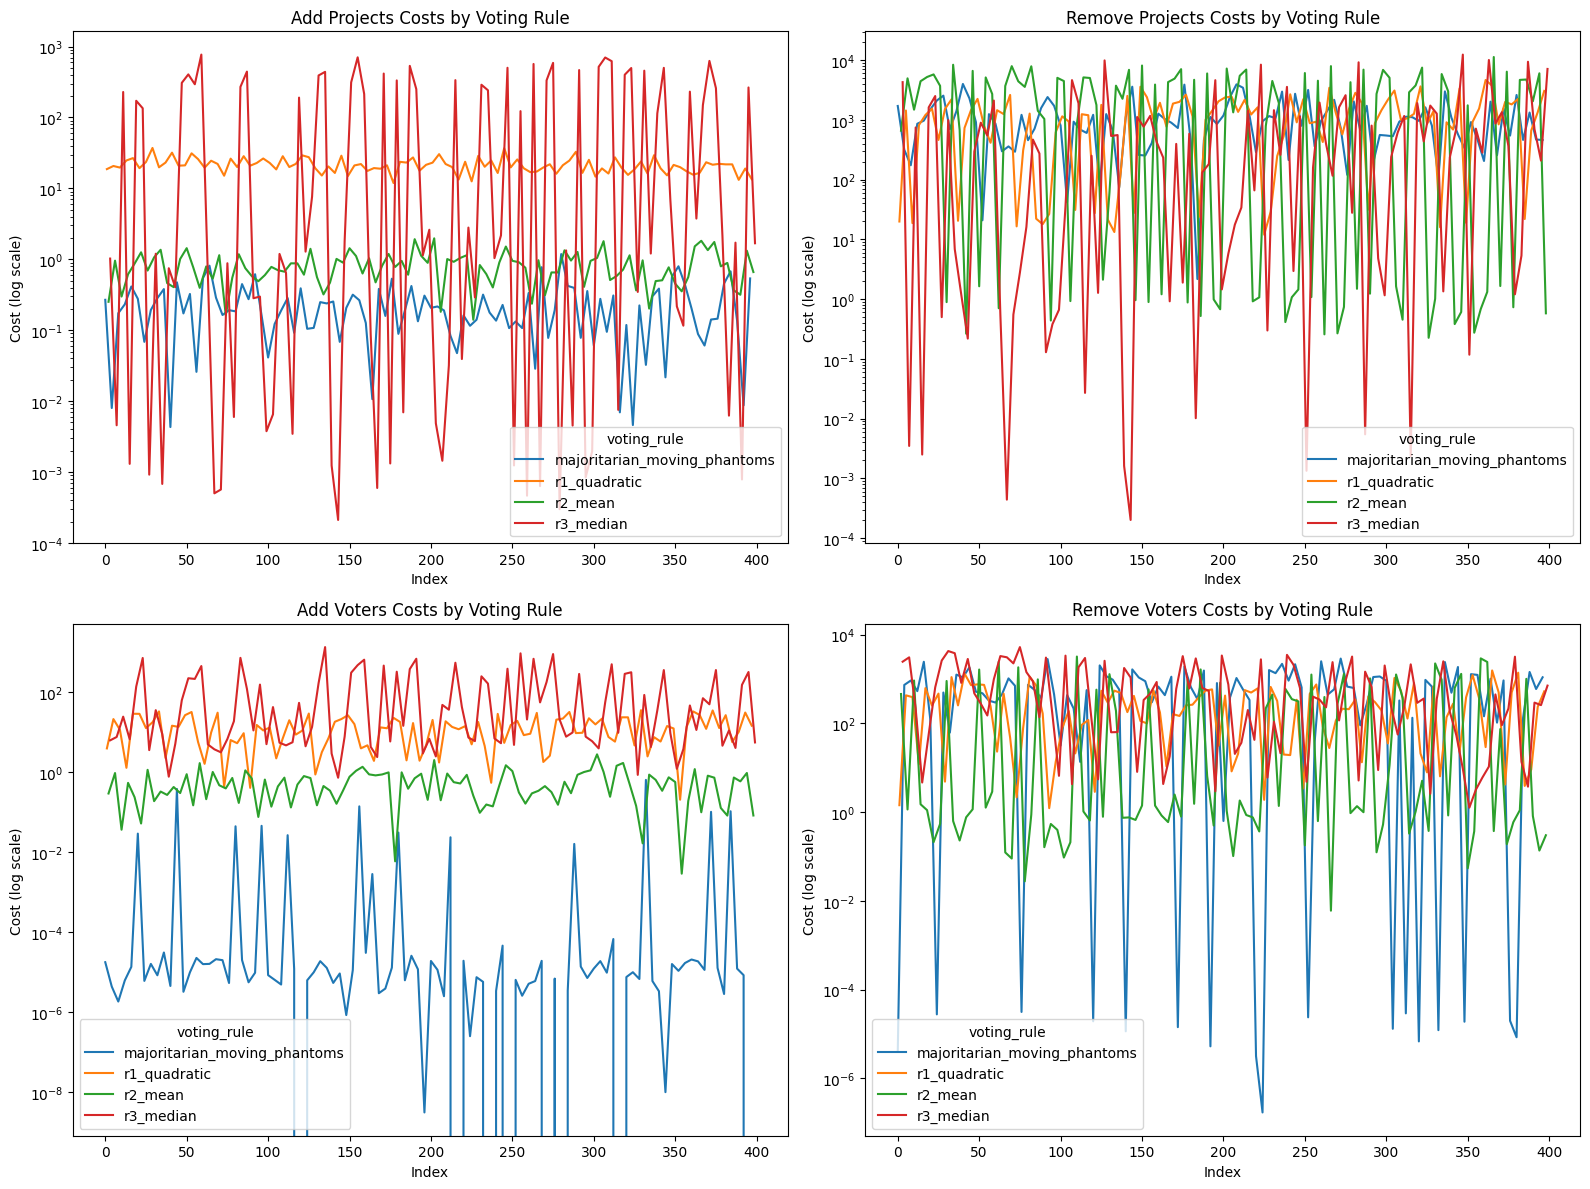

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plotting for each control strategy
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Line Plot for add_projects
sns.lineplot(x=control_results.index, y='add_projects', hue='voting_rule', data=control_results, ax=axes[0, 0])
axes[0, 0].set_yscale('log')
axes[0, 0].set_title('Add Projects Costs by Voting Rule')
axes[0, 0].set_xlabel('Index')
axes[0, 0].set_ylabel('Cost (log scale)')

# Line Plot for remove_projects
sns.lineplot(x=control_results.index, y='remove_projects', hue='voting_rule', data=control_results, ax=axes[0, 1])
axes[0, 1].set_yscale('log')
axes[0, 1].set_title('Remove Projects Costs by Voting Rule')
axes[0, 1].set_xlabel('Index')
axes[0, 1].set_ylabel('Cost (log scale)')

# Line Plot for add_voters
sns.lineplot(x=control_results.index, y='add_voters', hue='voting_rule', data=control_results, ax=axes[1, 0])
axes[1, 0].set_yscale('log')
axes[1, 0].set_title('Add Voters Costs by Voting Rule')
axes[1, 0].set_xlabel('Index')
axes[1, 0].set_ylabel('Cost (log scale)')

# Line Plot for remove_voters
sns.lineplot(x=control_results.index, y='remove_voters', hue='voting_rule', data=control_results, ax=axes[1, 1])
axes[1, 1].set_yscale('log')
axes[1, 1].set_title('Remove Voters Costs by Voting Rule')
axes[1, 1].set_xlabel('Index')
axes[1, 1].set_ylabel('Cost (log scale)')

plt.tight_layout()
plt.show()


In [12]:
# Analyze the results
def analyze_results(df):
    analysis = df.groupby('voting_rule').describe().transpose()
    return analysis

analysis_results = analyze_results(control_results)
analysis_results

voting_rule            majoritarian_moving_phantoms  r1_quadratic  \
add_projects    count                  1.000000e+02    100.000000   
                mean                   2.457101e-01     21.525947   
                std                    2.036795e-01      5.075797   
                min                    4.309237e-03     11.904213   
                25%                    1.071528e-01     18.564052   
                50%                    1.919024e-01     20.989790   
                75%                    3.193991e-01     24.114112   
                max                    1.185538e+00     37.201226   
remove_projects count                  1.000000e+02    100.000000   
                mean                   1.138791e+03   1299.064914   
                std                    9.507228e+02   1038.306704   
                min                    2.169528e+00     11.983526   
                25%                    4.611059e+02    519.762124   
                50%                    9.185376e+02   1203.674976   
                75%                    1.473158e+03   1951.229476   
                max                    3.994850e+03   4658.396909   
add_voters      count                  1.000000e+02    100.000000   
                mean                   1.588831e-02     13.804776   
                std                    7.650969e-02      9.858437   
                min                    0.000000e+00      0.204794   
                25%                    5.040097e-06      5.396347   
                50%                    9.861565e-06     12.624627   
                75%                    1.898339e-05     20.767886   
                max                    6.415122e-01     35.576880   
remove_voters   count                  1.000000e+02    100.000000   
                mean                   7.284648e+02    333.029349   
                std                    7.060247e+02    345.999731   
                min                    1.709246e-07      1.227887   
                25%                    1.299030e+02     28.841702   
                50%                    5.722761e+02    247.050215   
                75%                    1.081895e+03    506.178765   
                max                    2.883099e+03   1557.084467   

voting_rule                 r2_mean     r3_median  
add_projects    count    100.000000    100.000000  
                mean       0.830881    156.693859  
                std        0.410256    217.362107  
                min        0.140533      0.000211  
                25%        0.527603      0.006839  
                50%        0.787768      1.700781  
                75%        1.044232    297.694080  
                max        1.978265    770.963627  
remove_projects count    100.000000    100.000000  
                mean    2866.595736   1272.843575  
                std     2886.287715   2498.607878  
                min        0.225226      0.000201  
                25%        1.056724      1.426547  
                50%     2153.238907    278.306413  
                75%     5060.187518   1164.979097  
                max    11293.300475  12387.037933  
add_voters      count    100.000000    100.000000  
                mean       0.591795    152.928518  
                std        0.479445    251.612647  
                min        0.002894      0.726633  
                25%        0.202087      5.529978  
                50%        0.480595     19.782676  
                75%        0.870837    217.544286  
                max        2.793967   1346.445993  
remove_voters   count    100.000000    100.000000  
                mean     378.681470   1031.036738  
                std      695.754825   1279.861811  
                min        0.006013      1.262173  
                25%        0.542252     55.541469  
                50%        1.127133    358.933982  
                75%      487.055400   2029.750879  
                max     3202.996835   5225.938713

Resistance: The quadratic aggregation method shows higher resistance to adding projects but lower resistance to removing projects compared to mean and median aggregation methods. Median aggregation shows the highest resistance to removing projects and adding voters.
Costs: Removing projects and voters generally incurs higher costs than adding them, indicating greater resistance to these control strategies.
Variability: High standard deviations and max values indicate significant variability in the costs, suggesting that the effectiveness of control strategies can vary widely depending on specific scenarios.

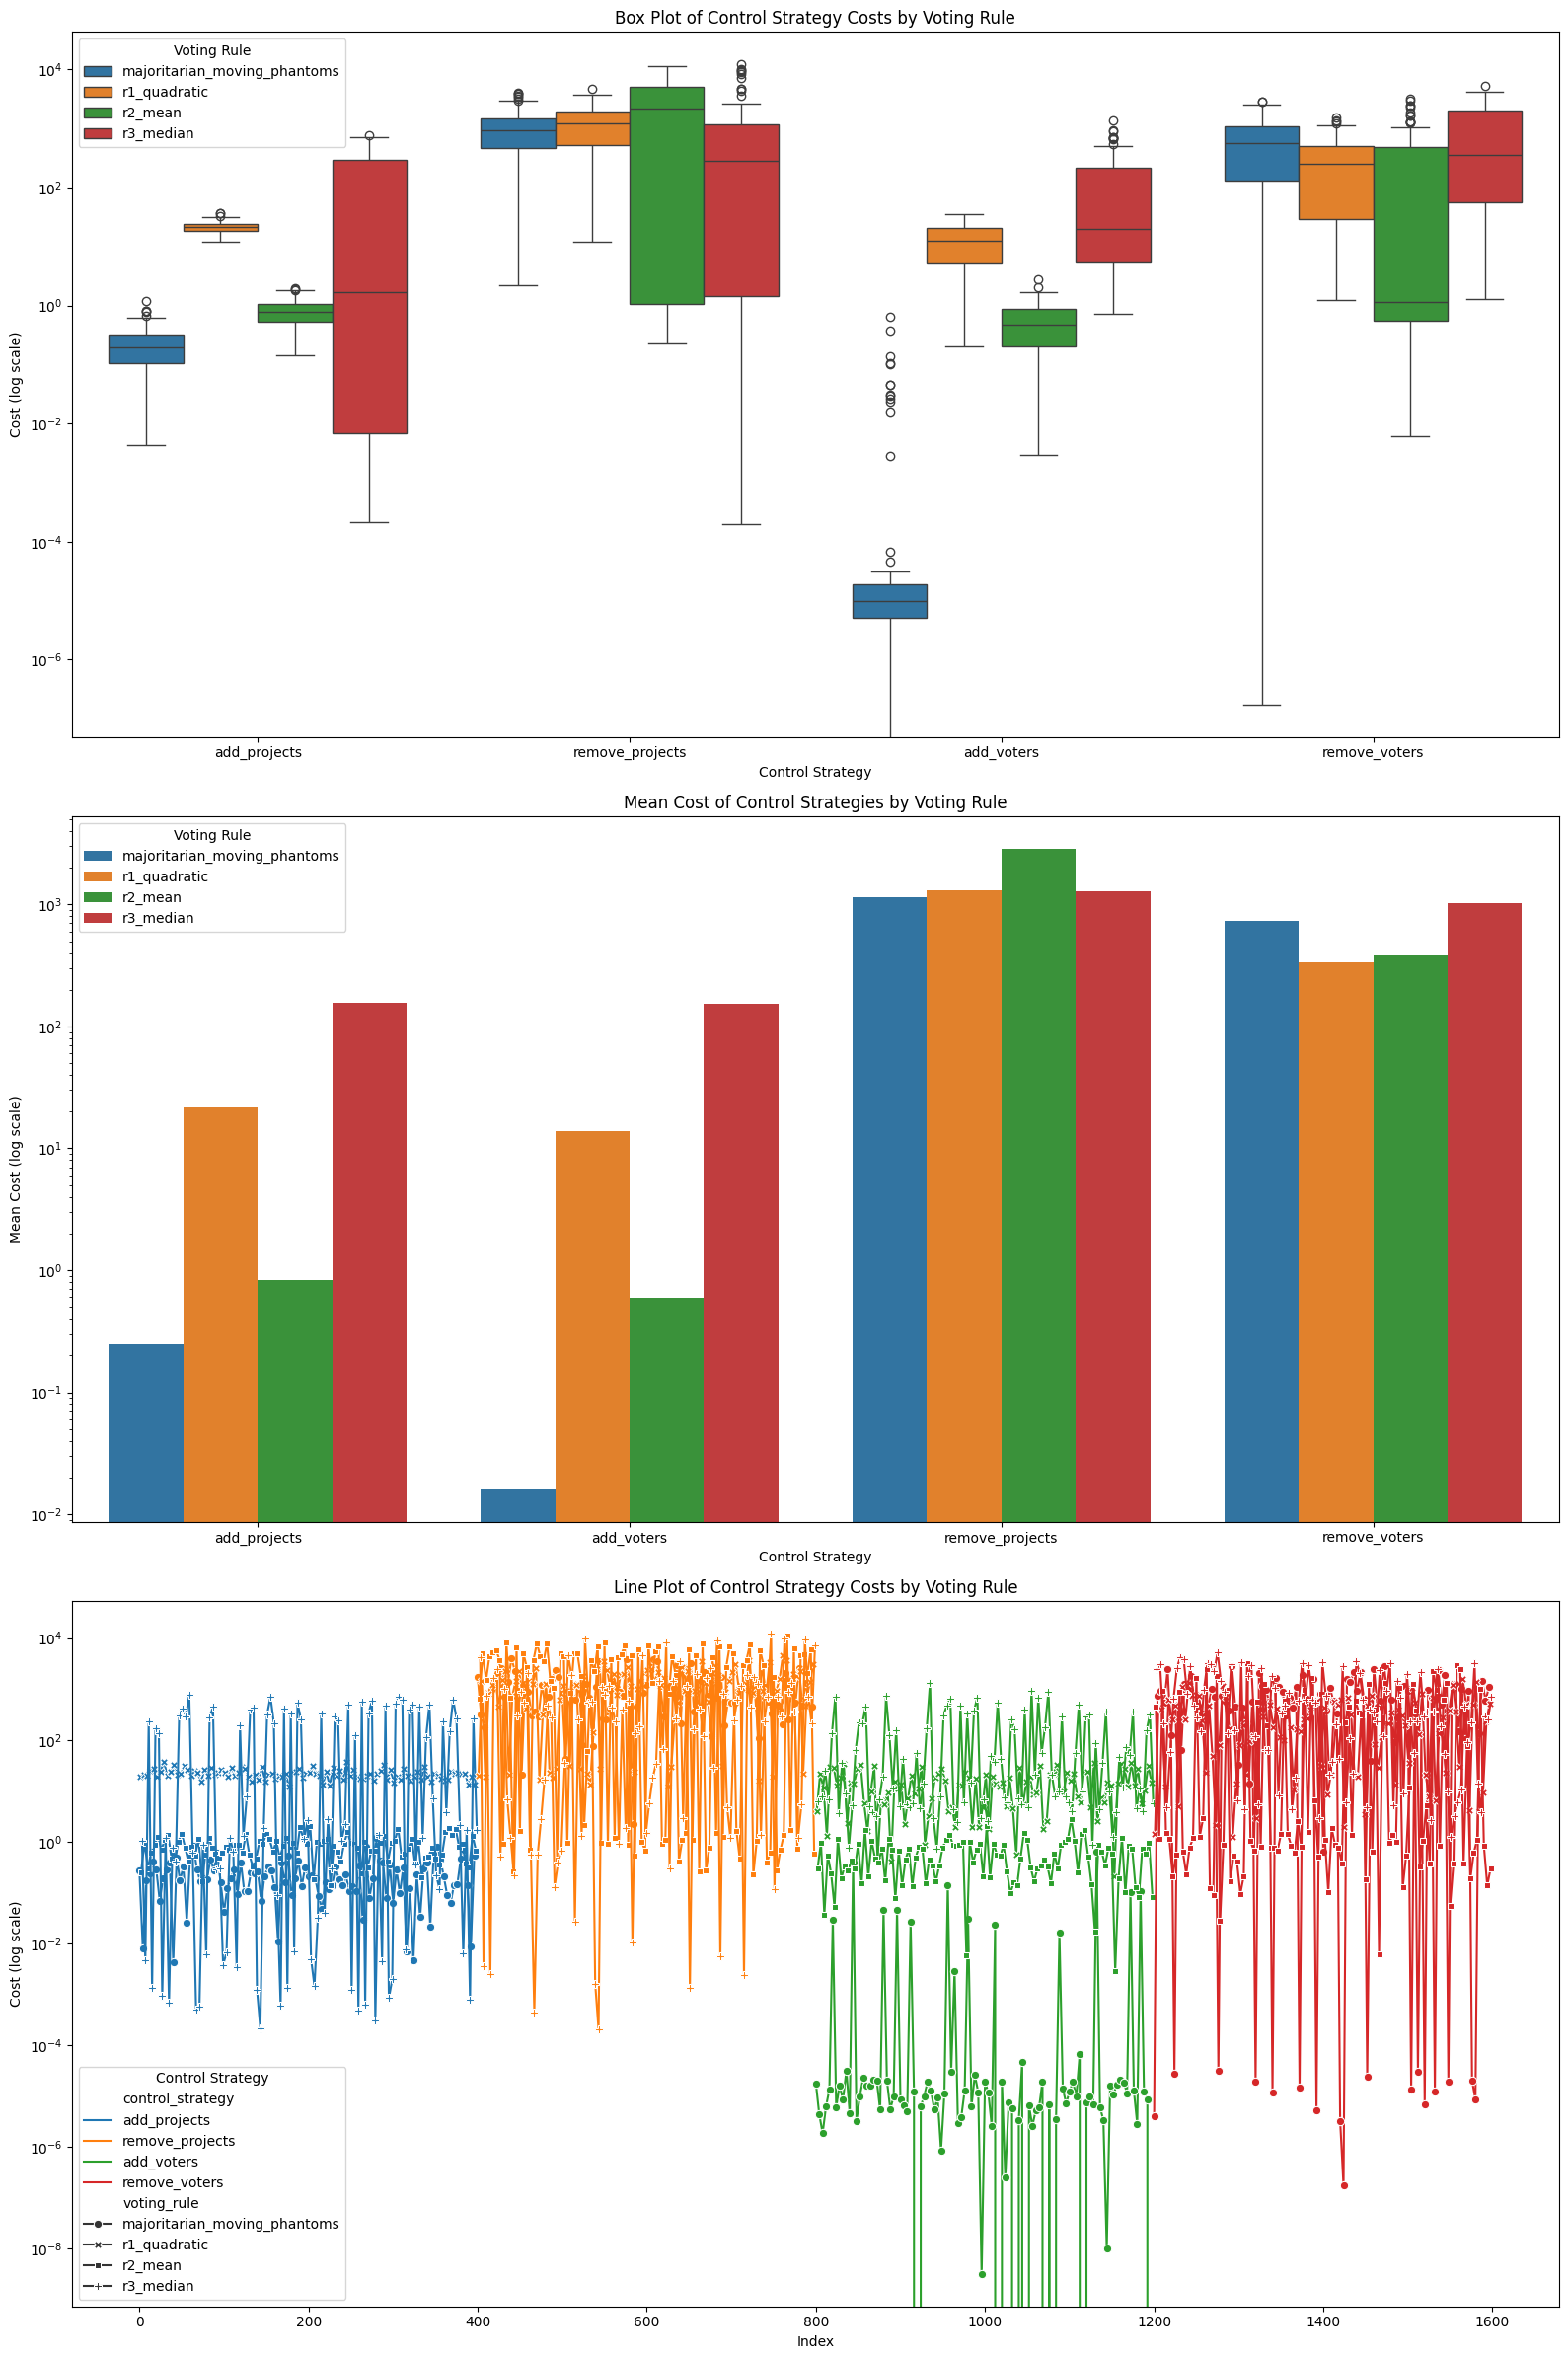

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming `control_results_raw` is the DataFrame with the provided data

# Prepare data for plotting
control_results_long = control_results.melt(id_vars=['voting_rule'], var_name='control_strategy', value_name='cost')

# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 1, figsize=(16, 24))

# Box Plot
sns.boxplot(x='control_strategy', y='cost', hue='voting_rule', data=control_results_long, ax=axes[0])
axes[0].set_yscale('log')
axes[0].set_title('Box Plot of Control Strategy Costs by Voting Rule')
axes[0].set_xlabel('Control Strategy')
axes[0].set_ylabel('Cost (log scale)')
axes[0].legend(title='Voting Rule')

# Bar Plot for Mean Costs
mean_data = control_results_long.groupby(['control_strategy', 'voting_rule']).mean().reset_index()
sns.barplot(x='control_strategy', y='cost', hue='voting_rule', data=mean_data, ax=axes[1])
axes[1].set_yscale('log')
axes[1].set_title('Mean Cost of Control Strategies by Voting Rule')
axes[1].set_xlabel('Control Strategy')
axes[1].set_ylabel('Mean Cost (log scale)')
axes[1].legend(title='Voting Rule')

# Line Plot for Individual Data Points
sns.lineplot(x='index', y='cost', hue='control_strategy', style='voting_rule', markers=True, dashes=False, data=control_results_long.reset_index(), ax=axes[2])
axes[2].set_yscale('log')
axes[2].set_title('Line Plot of Control Strategy Costs by Voting Rule')
axes[2].set_xlabel('Index')
axes[2].set_ylabel('Cost (log scale)')
axes[2].legend(title='Control Strategy')

plt.tight_layout()
plt.show()


/var/folders/jc/585j6n692cs_9w0hfdcpf43w0000gn/T/ipykernel_93647/2060427186.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='control_strategy', y='mean_cost', hue='voting_rule', data=mean_std_data, ax=axes[1], ci=None)


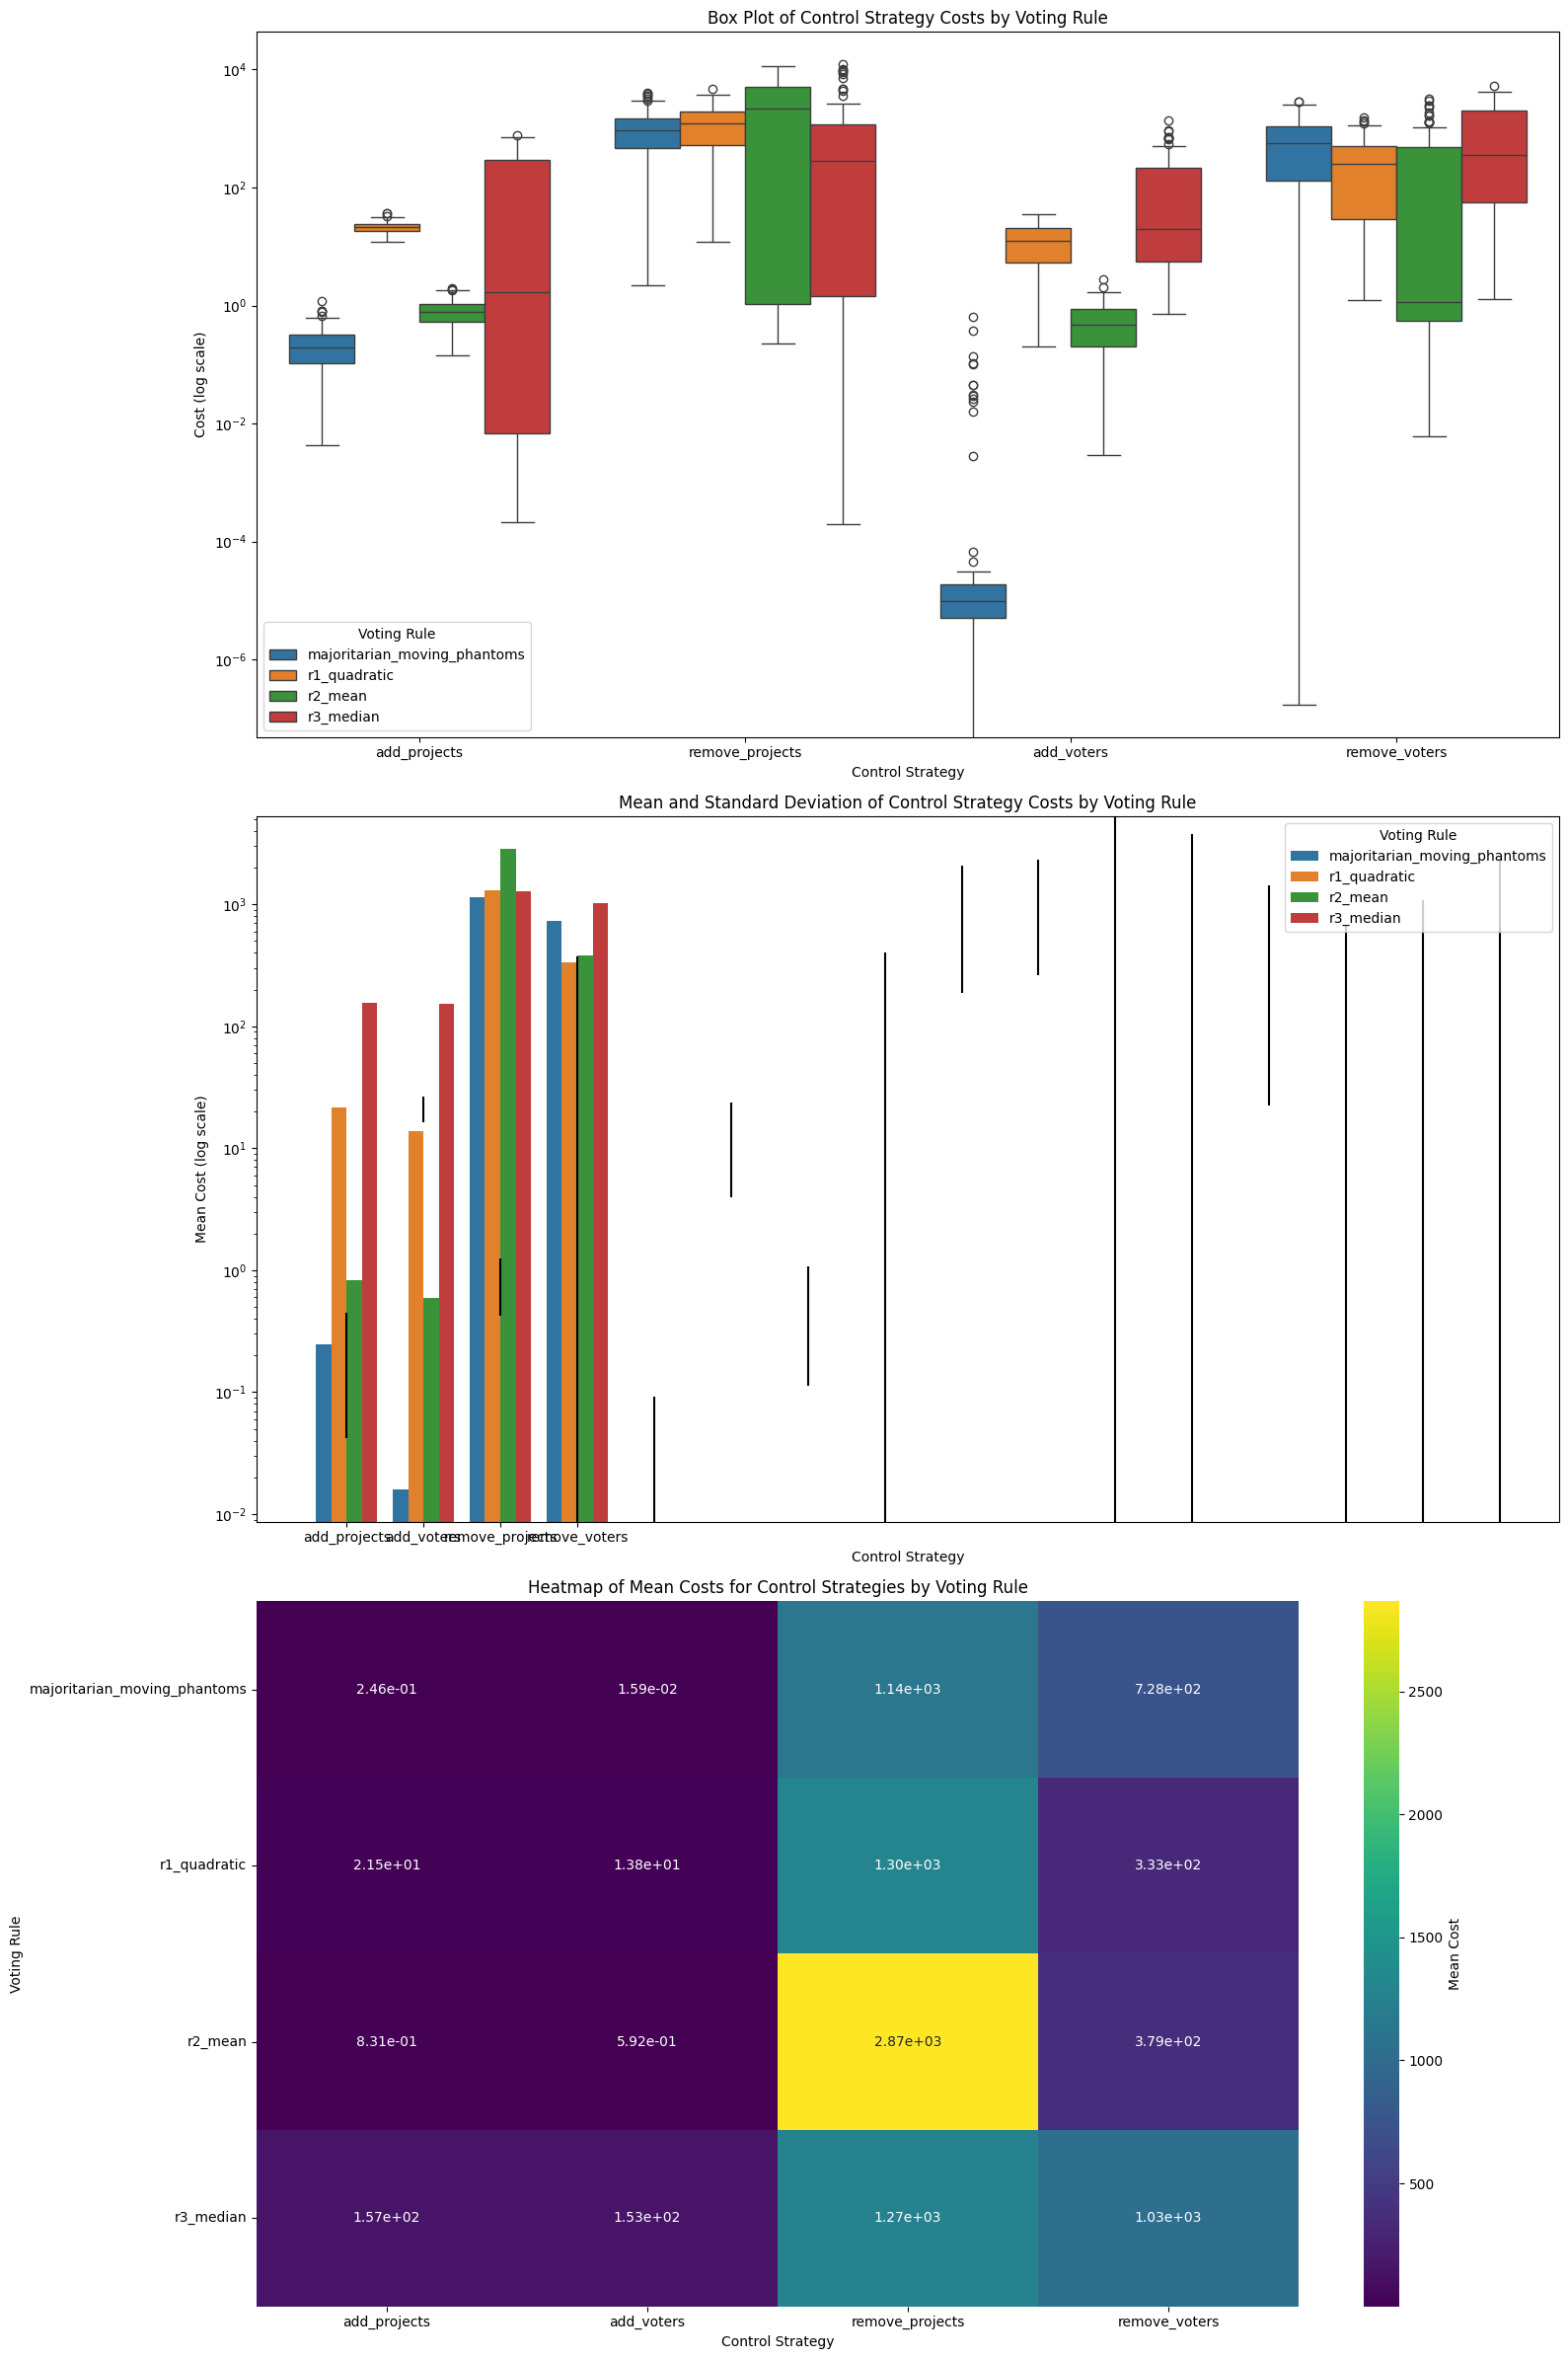

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Preparing data for enhanced visualization
control_results_long = control_results.melt(id_vars=['voting_rule'], var_name='control_strategy', value_name='cost')

# Creating a figure with multiple subplots
fig, axes = plt.subplots(3, 1, figsize=(16, 24))

# Box Plot
sns.boxplot(x='control_strategy', y='cost', hue='voting_rule', data=control_results_long, ax=axes[0])
axes[0].set_yscale('log')
axes[0].set_title('Box Plot of Control Strategy Costs by Voting Rule')
axes[0].set_xlabel('Control Strategy')
axes[0].set_ylabel('Cost (log scale)')
axes[0].legend(title='Voting Rule')

# Bar Plot for Mean and Standard Deviation
mean_std_data = control_results_long.groupby(['control_strategy', 'voting_rule']).agg(['mean', 'std']).reset_index()

# Flatten the MultiIndex
mean_std_data.columns = ['_'.join(col).strip() for col in mean_std_data.columns.values]
mean_std_data = mean_std_data.rename(columns={
    'control_strategy_': 'control_strategy', 
    'voting_rule_': 'voting_rule', 
    'cost_mean': 'mean_cost', 
    'cost_std': 'std_cost'
})

sns.barplot(x='control_strategy', y='mean_cost', hue='voting_rule', data=mean_std_data, ax=axes[1], ci=None)
axes[1].set_yscale('log')
for i, row in mean_std_data.iterrows():
    axes[1].errorbar(i, row['mean_cost'], yerr=row['std_cost'], fmt='none', c='black')
axes[1].set_title('Mean and Standard Deviation of Control Strategy Costs by Voting Rule')
axes[1].set_xlabel('Control Strategy')
axes[1].set_ylabel('Mean Cost (log scale)')
axes[1].legend(title='Voting Rule')

# Heatmap for Mean Costs
pivot_table = mean_std_data.pivot_table(index='voting_rule', columns='control_strategy', values='mean_cost')
sns.heatmap(pivot_table, annot=True, fmt=".2e", cmap='viridis', ax=axes[2], cbar_kws={'label': 'Mean Cost'})
axes[2].set_title('Heatmap of Mean Costs for Control Strategies by Voting Rule')
axes[2].set_xlabel('Control Strategy')
axes[2].set_ylabel('Voting Rule')

plt.tight_layout()
plt.show()


# Evaluate Robustness

In [15]:

robustness_results = eval_metrics.evaluate_robustness(num_rounds)
print("Robustness Results:")
robustness_results.head(100)



Robustness Results:


,majoritarian_moving_phantoms_distances,r1_quadratic_distances,r2_mean_distances,r3_median_distances,round
0,0.011284,6.065727,0.253028,0.000000,1
1,0.874840,531.628614,0.406628,69.029806,2
2,0.000000,0.688711,0.368161,529.418847,3
3,0.000000,0.367511,0.742031,0.000000,4
4,0.000000,17.857219,409.316444,0.000000,5
...,...,...,...,...,...
95,1875.028832,6.476568,942.606551,340.408922,96
96,0.000000,1.620466,0.481617,320.781120,97
97,0.000000,5.508468,512.869037,0.000000,98
98,0.000000,1.118295,0.492379,0.000000,99


In [17]:
print(f"Avg Mean L1 Distance: {np.mean(robustness_results['r1_quadratic_distances'])}")
print(f"Avg Median L1 Distance: {np.mean(robustness_results['r2_mean_distances'])}")
print(f"Avg Quadratic L1 Distance: {np.mean(robustness_results['r3_median_distances'])}")
print(f"Avg Majortarian L1 Distance: {np.mean(robustness_results['majoritarian_moving_phantoms_distances'])}")

Avg Mean L1 Distance: 111.15180675462476
Avg Median L1 Distance: 103.35897418521479
Avg Quadratic L1 Distance: 187.22939503267946
Avg Majortarian L1 Distance: 110.67327172856605


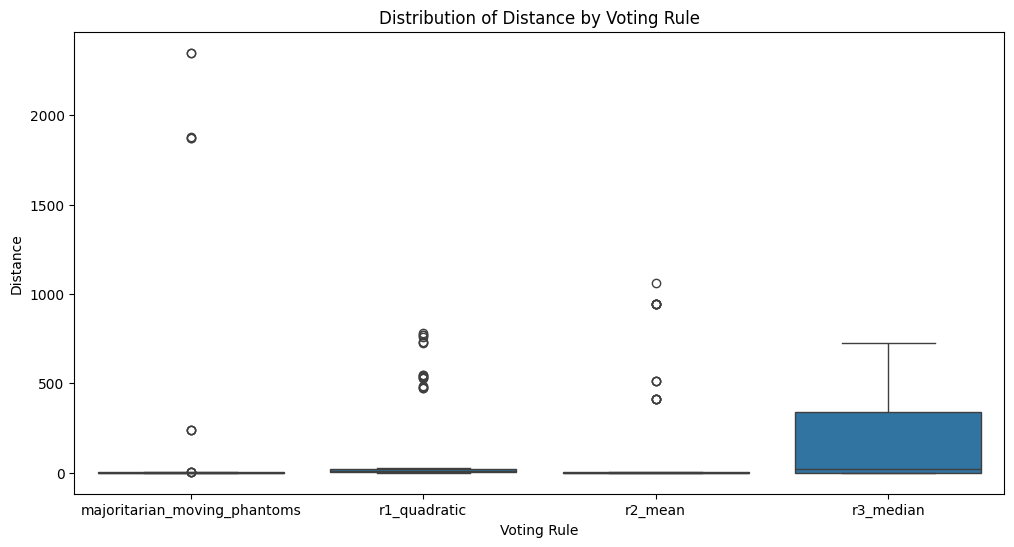

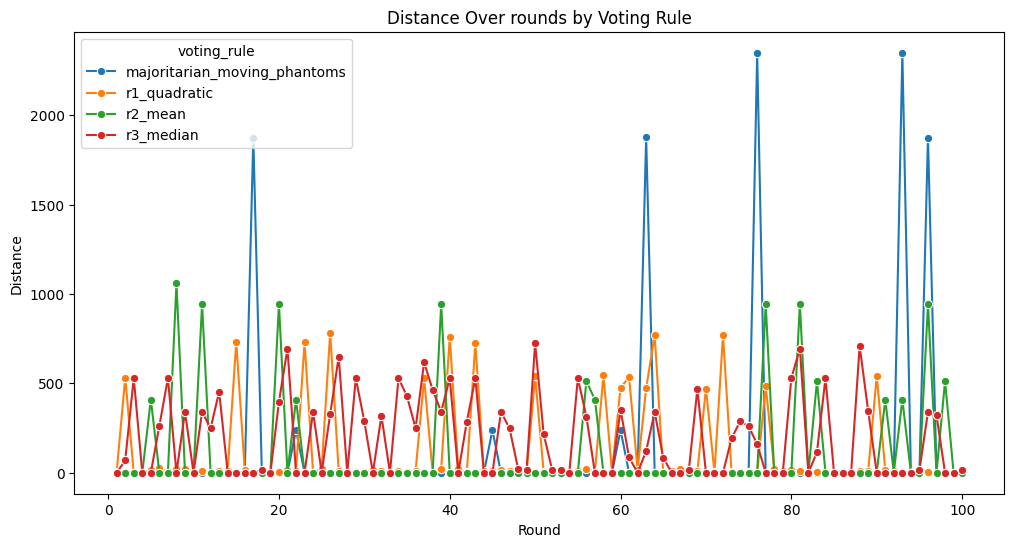

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
robustness_results_long = robustness_results.melt(id_vars=['round'], var_name='voting_rule', value_name='distance')
robustness_results_long['voting_rule'] = robustness_results_long['voting_rule'].str.replace('_distances', '')

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='voting_rule', y='distance', data=robustness_results_long)
plt.title('Distribution of Distance by Voting Rule')
plt.xlabel('Voting Rule')
plt.ylabel('Distance')
plt.show()

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='round', y='distance', hue='voting_rule', data=robustness_results_long, marker='o')
plt.title('Distance Over rounds by Voting Rule')
plt.xlabel('Round')
plt.ylabel('Distance')
plt.show()


# Evaluate Group Strategyproofness

In [19]:

group_strategyproofness_results = eval_metrics.evaluate_group_strategyproofness()
print("Group Strategyproofness Results:")
print(group_strategyproofness_results)

Group Strategyproofness Results:
                    voting_rule  group_strategyproof
0  majoritarian_moving_phantoms                False
1                  r1_quadratic                False
2                       r2_mean                False
3                     r3_median                False


# Evaluate Bribery Cost

In [20]:
bribery_results = eval_metrics.evaluate_bribery(num_rounds)
print("Bribery Cost Results:")
bribery_results.head(100)

Bribery Cost Calculation Function for majoritarian_moving_phantoms is not defined in EvalMetrics
Bribery Cost Calculation Function for majoritarian_moving_phantoms is not defined in EvalMetrics
Bribery Cost Calculation Function for majoritarian_moving_phantoms is not defined in EvalMetrics
Bribery Cost Calculation Function for majoritarian_moving_phantoms is not defined in EvalMetrics
Bribery Cost Calculation Function for majoritarian_moving_phantoms is not defined in EvalMetrics
Bribery Cost Calculation Function for majoritarian_moving_phantoms is not defined in EvalMetrics
Bribery Cost Calculation Function for majoritarian_moving_phantoms is not defined in EvalMetrics
Bribery Cost Calculation Function for majoritarian_moving_phantoms is not defined in EvalMetrics
Bribery Cost Calculation Function for majoritarian_moving_phantoms is not defined in EvalMetrics
Bribery Cost Calculation Function for majoritarian_moving_phantoms is not defined in EvalMetrics
Bribery Cost Calculation Funct

,round,desired_increase,majoritarian_moving_phantoms_bribery_cost,r1_quadratic_bribery_cost,r2_mean_bribery_cost,r3_median_bribery_cost
0,1,10000.0,0,1.562396e+07,50000.0,10000.0
1,2,20000.0,0,3.715692e+07,100000.0,20000.0
2,3,30000.0,0,6.810741e+07,150000.0,30000.0
3,4,40000.0,0,9.451064e+07,200000.0,40000.0
4,5,50000.0,0,1.090268e+08,250000.0,50000.0
...,...,...,...,...,...,...
95,96,960000.0,0,2.707884e+09,4800000.0,960000.0
96,97,970000.0,0,2.717048e+09,4850000.0,970000.0
97,98,980000.0,0,2.782668e+09,4900000.0,980000.0
98,99,990000.0,0,2.837928e+09,4950000.0,990000.0


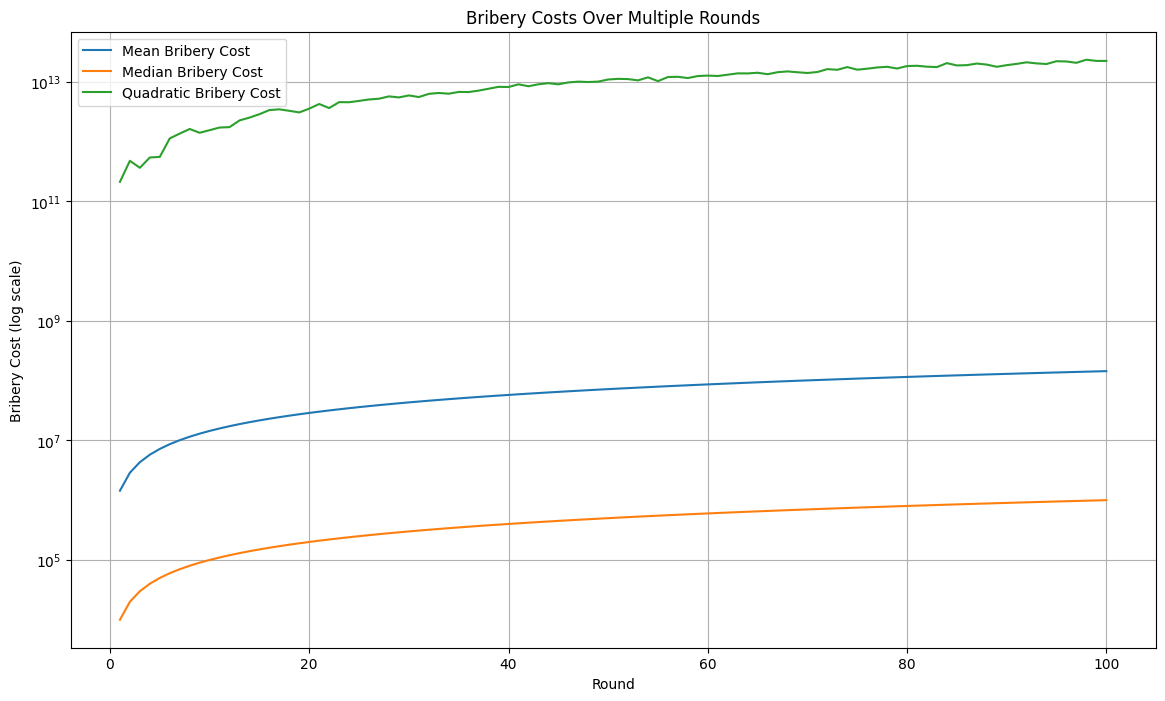

In [21]:
import matplotlib.pyplot as plt

# Plot the results with a logarithmic y-axis
def plot_bribery_costs(df):
    plt.figure(figsize=(14, 8))

    # Plot mean bribery cost
    plt.plot(df['round'], df['r2_mean_bribery_cost'], label='Mean Bribery Cost')

    # Plot median bribery cost
    plt.plot(df['round'], df['r3_median_bribery_cost'], label='Median Bribery Cost')

    # Plot quadratic bribery cost
    plt.plot(df['round'], df['r1_quadratic_bribery_cost'], label='Quadratic Bribery Cost')

    plt.xlabel('Round')
    plt.ylabel('Bribery Cost (log scale)')
    plt.yscale('log')
    plt.title('Bribery Costs Over Multiple Rounds')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the bribery costs
plot_bribery_costs(bribery_results)

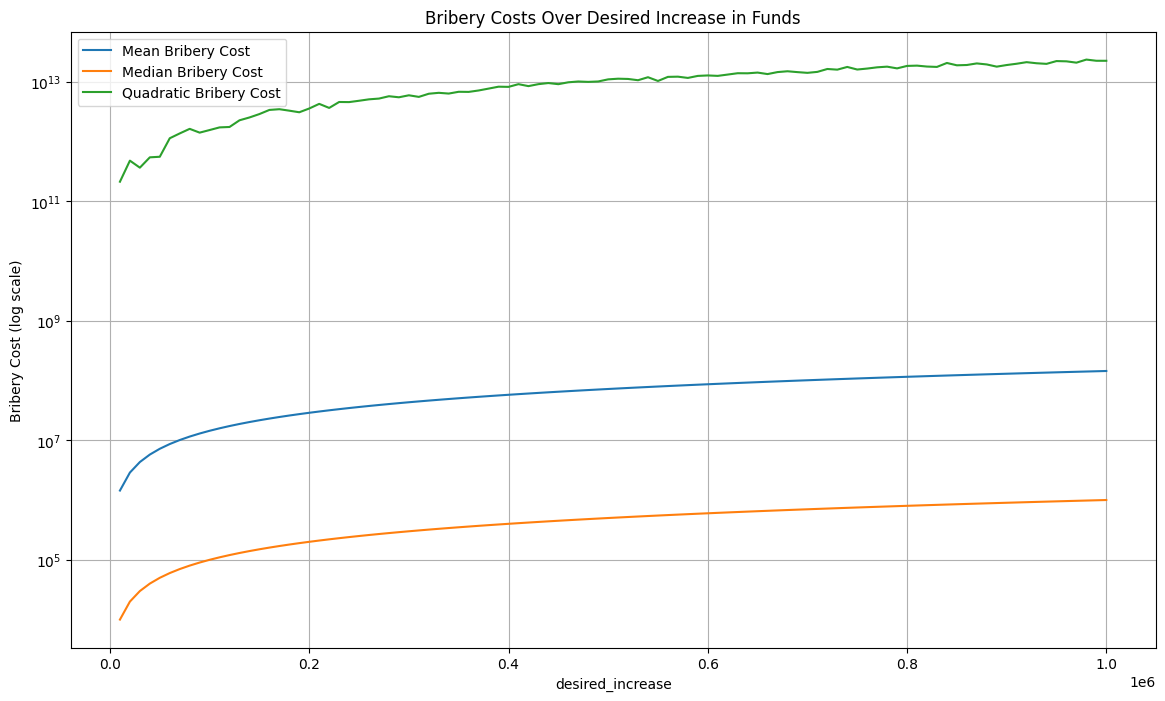

In [23]:
def plot_bribery_costs(df):
    plt.figure(figsize=(14, 8))

    # Plot mean bribery cost
    plt.plot(df['desired_increase'], df['r2_mean_bribery_cost'], label='Mean Bribery Cost')

    # Plot median bribery cost
    plt.plot(df['desired_increase'], df['r3_median_bribery_cost'], label='Median Bribery Cost')

    # Plot quadratic bribery cost
    plt.plot(df['desired_increase'], df['r1_quadratic_bribery_cost'], label='Quadratic Bribery Cost')

    plt.xlabel('desired_increase')
    plt.ylabel('Bribery Cost (log scale)')
    plt.yscale('log')
    plt.title('Bribery Costs Over Desired Increase in Funds')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the bribery costs
plot_bribery_costs(bribery_results)

In [26]:
summary_stats = bribery_results[['r1_quadratic_bribery_cost', 'r2_mean_bribery_cost', 'r3_median_bribery_cost']].describe()
print(summary_stats)

       r1_quadratic_bribery_cost  r2_mean_bribery_cost  r3_median_bribery_cost
count               1.000000e+02          1.000000e+02              100.000000
mean                1.072250e+13          7.272000e+07           505000.000000
std                 6.659951e+12          4.177655e+07           290114.919759
min                 2.112024e+11          1.440000e+06            10000.000000
25%                 4.977170e+12          3.708000e+07           257500.000000
50%                 1.038103e+13          7.272000e+07           505000.000000
75%                 1.653266e+13          1.083600e+08           752500.000000
max                 2.332015e+13          1.440000e+08          1000000.000000
